## STAGATE tutorial

### 0. import packages and select GPU if accessible

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
from sklearn.metrics.cluster import adjusted_rand_score
import STAGATE_pyG as STAGATE
import torch
from st_loading_utils import load_DLPFC, load_BC, load_mVC, load_mPFC, load_mHypothalamus, load_her2_tumor, load_mMAMP, load_spacelhBC

# Run device, by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
iters = 1 # for script testing


### 1. DLPFC dataset

change '${dir_}' to  'path/to/your/DLPFC/data'

In [ ]:
"""DLPFC"""
setting_combinations = [[7, '151507'], [7, '151508'], [7, '151509'], [7, '151510'], [5, '151669'], [5, '151670'], [5, '151671'], [5, '151672'], [7, '151673'], [7, '151674'], [7, '151675'], [7, '151676']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]  # 7

   dataset = setting_combi[1]  # '151673'
   
   dir_ = '/home/yunfei/spatial_benchmarking/benchmarking_data/DLPFC12'
   ad = load_DLPFC(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(ad, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(ad, target_sum=1e4)
   sc.pp.log1p(ad)

   STAGATE.Cal_Spatial_Net(ad, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(ad)
   for iter in range(iters):

      
      ad = STAGATE.train_STAGATE(ad)
      sc.pp.neighbors(ad, use_rep='STAGATE')
      sc.tl.umap(ad)
      ad = STAGATE.mclust_R(ad, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = ad.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('DLPFC' + dataset + ' ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

### 2. BC/MA datasets

In [ ]:
"""BC"""
setting_combinations = [[20, 'section1']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]  # 7

   dataset = setting_combi[1]  #
   
   dir_ = './benchmarking_data/BC'
   adata = load_BC(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=450)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('HBRC1 ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

In [ ]:
"""load MA section"""
setting_combinations = [[52, 'MA']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0] 

   dataset = setting_combi[1]
   
   dir_ = './benchmarking_data/mMAMP'
   adata = load_mMAMP(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('mABC ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

### 3. mVC/mPFC datasets

In [ ]:
"""mVC"""
setting_combinations = [[7, 'STARmap_20180505_BY3_1k.h5ad']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]

   dataset = setting_combi[1]
   
   dir_ = './benchmarking_data/STARmap_mouse_visual_cortex'
   adata = load_mVC(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('mVC ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

In [ ]:
"""mPFC"""
setting_combinations = [[4, '20180417_BZ5_control'], [4, '20180419_BZ9_control'], [4, '20180424_BZ14_control']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]

   dataset = setting_combi[1]
   
   dir_ = './benchmarking_data/STARmap_mouse_PFC'
   adata = load_mPFC(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('mPFC' + dataset + ' ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

### 4. mHypothalamus dataset

In [ ]:
"""mHypo"""
setting_combinations = [[8, '-0.04'], [8, '-0.09'], [8, '-0.14'], [8, '-0.19'], [8, '-0.24']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]

   dataset = setting_combi[1]
   
   dir_ = '/home/yunfei/spatial_benchmarking/benchmarking_data/mHypothalamus'
   adata = load_mHypothalamus(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('mHypothalamus' + dataset + ' ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

### 5. Her2Tumor dataset

In [ ]:
"""Her2"""
setting_combinations = [[6, 'A1'], [5, 'B1'], [4, 'C1'], [4, 'D1'], [4, 'E1'], [4, 'F1'], [7, 'G2'], [7, 'H1']]
for setting_combi in setting_combinations:
   n_clusters = setting_combi[0]

   dataset = setting_combi[1]
   
   dir_ = './benchmarking_data/Her2_tumor'
   adata = load_her2_tumor(root_dir=dir_, section_id=dataset)

   aris = []
   sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
   sc.pp.normalize_total(adata, target_sum=1e4)
   sc.pp.log1p(adata)

   STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
   STAGATE.Stats_Spatial_Net(adata)
   for iter in range(iters):

      
      adata = STAGATE.train_STAGATE(adata)
      sc.pp.neighbors(adata, use_rep='STAGATE')
      sc.tl.umap(adata)
      adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

      # calculate metric ARI
      obs_df = adata.obs.dropna()
      ARI = adjusted_rand_score(obs_df['mclust'], obs_df['original_clusters'])

      print('Dataset:', dataset)
      print('ARI:', ARI)
      aris.append(ARI)
   print('Dataset:', dataset)
   print(aris)
   print(np.mean(aris))
   with open('stagate_aris.txt', 'a+') as fp:
      fp.write('Her2tumor' + dataset + ' ')
      fp.write(' '.join([str(i) for i in aris]))
      fp.write('\n')

### 6. mouse hyppocampus

In [ ]:
"""mouse hyppocampus"""

n_clusters = 14


dir2 = '/home/yunfei/spatial_benchmarking/benchmarking_data/mouse_hyppocampus_slideseqv2'
data2 = 'sshippo.h5ad'

# adata1 = load_BC(root_dir=dir1, section_id=data1)
adata2 = sc.read_h5ad(os.path.join(dir2, data2))

aris = []
adata = adata2
iters = 5
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

STAGATE.Cal_Spatial_Net(adata, rad_cutoff=30)
STAGATE.Stats_Spatial_Net(adata)
for iter in range(iters):

    adata = STAGATE.train_STAGATE(adata)
    sc.pp.neighbors(adata, use_rep='STAGATE')
    sc.tl.umap(adata)
    adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters)

    # calculate metric ARI
    obs_df = adata.obs.dropna()
    ARI = adjusted_rand_score(obs_df['mclust'], obs_df['cluster'])

    # print('Dataset:', dataset)
    print('ARI:', ARI)
    aris.append(ARI)

In [5]:
obs_df = adata.obs.dropna()
ARI = adjusted_rand_score(obs_df['mclust'], obs_df['cluster'])

# print('Dataset:', dataset)
print('ARI:', ARI)

ARI: 0.06780919796152493


In [14]:
import numpy as np
import anndata
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (30.0, 10.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

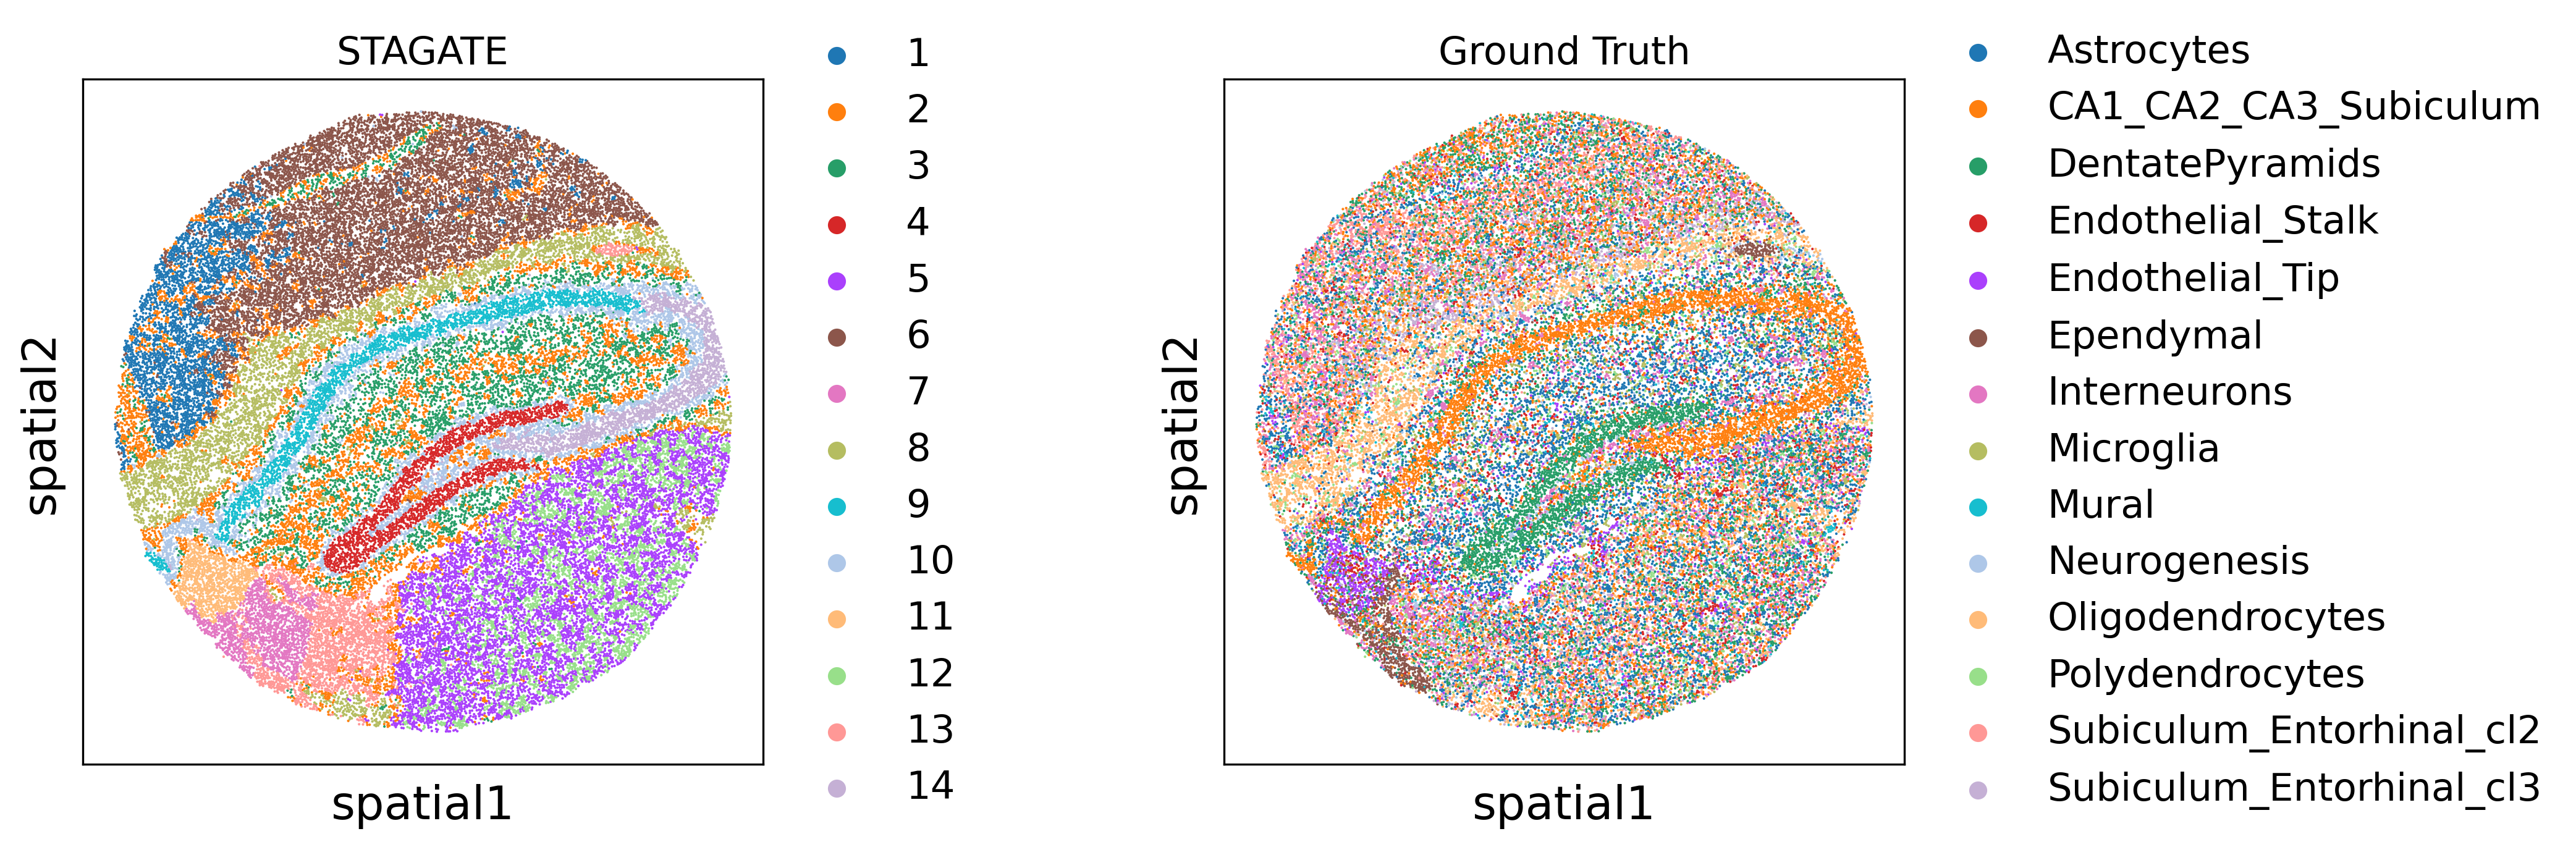

In [15]:
sc.pl.spatial(adata,
                color=["mclust", "cluster"],
                title=["STAGATE", "Ground Truth"],
                show=False, spot_size=20)
plt.savefig(os.path.join("/home/yunfei/spatial_benchmarking/BenchmarkST/analysis1110/clustering/mousehippo", "hippocampus.pdf"), bbox_inches='tight')

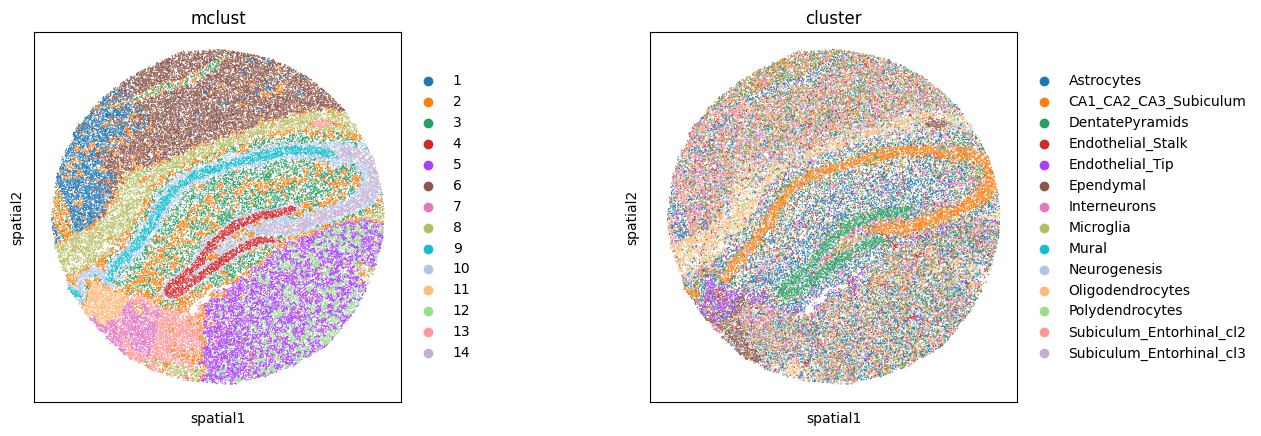

In [13]:
sc.pl.spatial(adata, color=["mclust", "cluster"],spot_size=20)